- ### Planteamiento del problema:

Clasificar casas basados en la ubicación/región e ingreso medio.

In [25]:
# Se importa el dataset
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [26]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')

Filas: 20640 | Columnas: 9


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
dataframe.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [29]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [30]:
nulos = dataframe.isnull().sum()

if len(nulos[nulos != 0]) == 0:

    print('No hay datos nulos')

else:

    print(nulos[nulos != 0])

No hay datos nulos


In [31]:
dataframe.dtypes.value_counts()

float64    9
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 20640 registros y 9 variables.
- Las 9 variables son numéricas.

In [32]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 0 registros duplicados.
El % de registros "duplicados" es 0.0.


No Existen datos duplicados en el dataframe.

Sólo nos interesan las columnas Latitude, Longitude y MedInc

In [33]:
dataframe = dataframe[['Latitude','Longitude','MedInc']]
dataframe.head(2)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014


Dividir el conjunto de datos.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dataframe, test_size = 0.2, random_state = 42)

Escalar Datos:

In [35]:
from sklearn.preprocessing import StandardScaler

name_columns = dataframe.columns.tolist()
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = name_columns) 

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = name_columns)

print(X_train_scaled.head(2))
print()
print(X_test_scaled.head(2))

       Latitude  Longitude    MedInc
14196 -1.372811   1.272587 -0.326196
8267  -0.876696   0.709162 -0.035843

       Latitude  Longitude    MedInc
20046  0.195100   0.285347 -1.155085
3024  -0.235491   0.060975 -0.708659


Construyendo el modelo

In [36]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=42)
kmeans_model.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [37]:
import numpy as np

cluster_train = kmeans_model.predict(X_train_scaled)
np.unique(cluster_train)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [38]:
#Añadir nueva columna al dataframe

dataframe_train = dataframe.loc[X_train.index]
dataframe_train["cluster"] =  cluster_train
dataframe_train

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,3
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,1
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


Gráfico

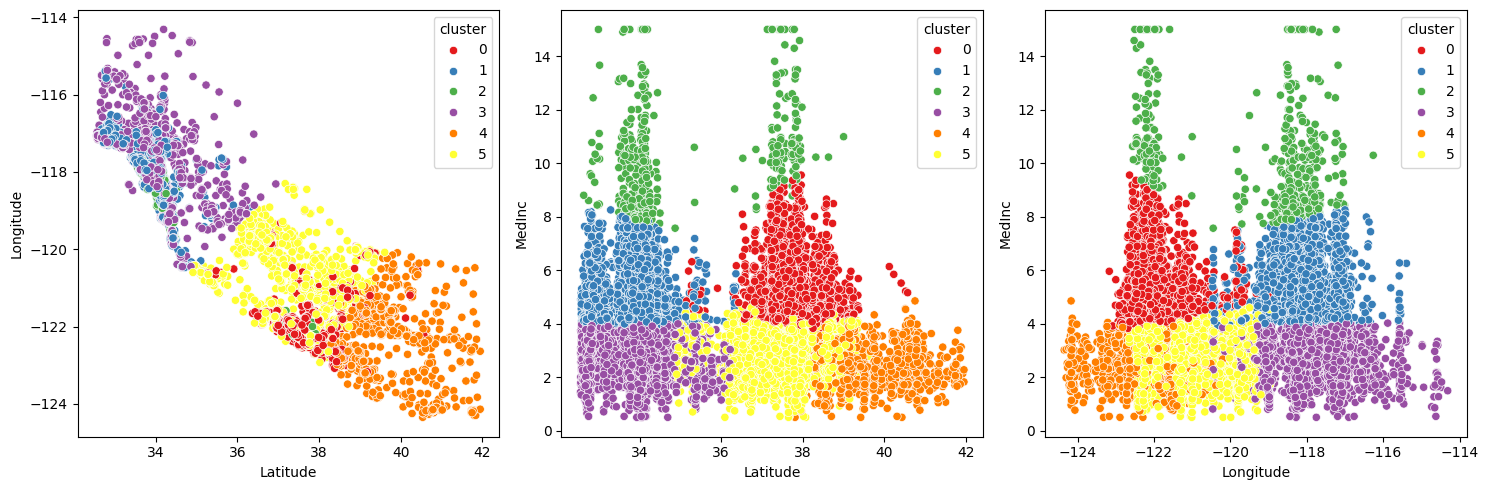

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data=dataframe_train, x="Latitude", y="Longitude", hue = 'cluster', palette="Set1")
sns.scatterplot(ax = axis[1], data=dataframe_train, x="Latitude", y="MedInc", hue = 'cluster', palette="Set1")
sns.scatterplot(ax = axis[2], data=dataframe_train, x="Longitude", y="MedInc", hue = 'cluster', palette="Set1")

plt.tight_layout()

plt.show()

In [40]:
#Predecir para el conjunto test

cluster_test = kmeans_model.predict(X_test_scaled)
dataframe_test = dataframe.loc[X_test.index]
dataframe_test["cluster"] =  cluster_test
dataframe_test

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,1
9814,36.62,-121.93,3.7250,5
...,...,...,...,...
15362,33.36,-117.22,4.6050,1
16623,35.36,-120.83,2.7266,5
18086,37.31,-122.05,9.2298,2
2144,36.77,-119.76,2.7850,5


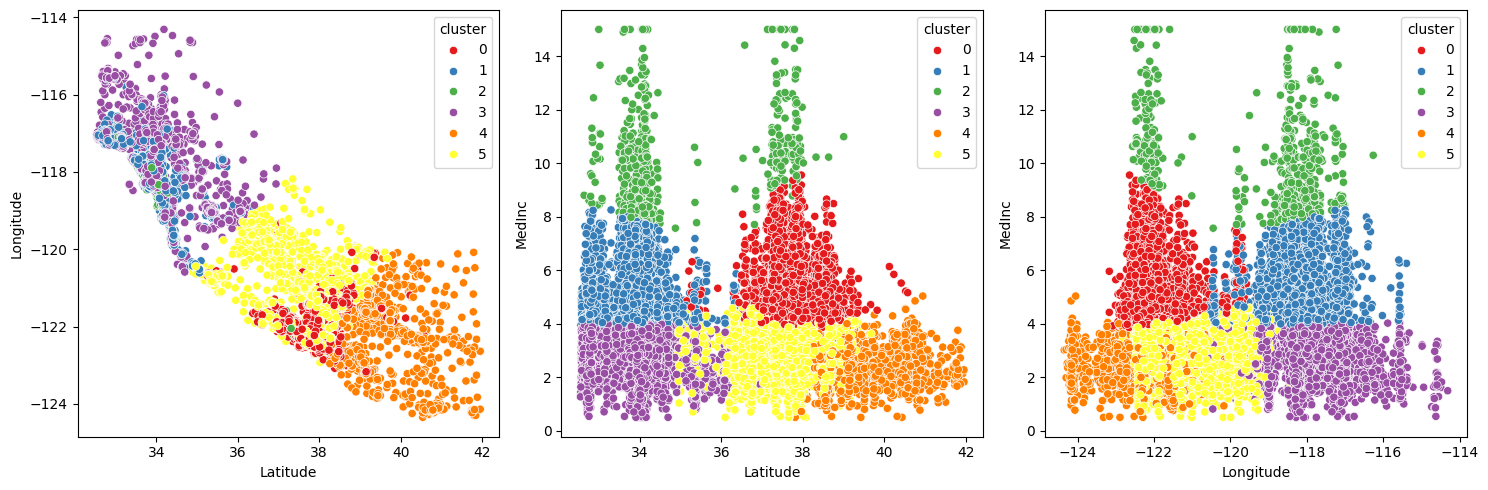

In [41]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#train
sns.scatterplot(ax = axis[0], data=dataframe_train, x="Latitude", y="Longitude", hue = 'cluster', palette="Set1")
sns.scatterplot(ax = axis[1], data=dataframe_train, x="Latitude", y="MedInc", hue = 'cluster', palette="Set1")
sns.scatterplot(ax = axis[2], data=dataframe_train, x="Longitude", y="MedInc", hue = 'cluster', palette="Set1")

#test
sns.scatterplot(ax = axis[0], data=dataframe_test, x="Latitude", y="Longitude", hue = 'cluster', palette="Set1", legend=False)
sns.scatterplot(ax = axis[1], data=dataframe_test, x="Latitude", y="MedInc", hue = 'cluster', palette="Set1", legend=False)
sns.scatterplot(ax = axis[2], data=dataframe_test, x="Longitude", y="MedInc", hue = 'cluster', palette="Set1", legend=False)

plt.tight_layout()

plt.show()

Ahora entrenaremos el modelo supervisado.

In [42]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(random_state=42)

In [43]:
X_train_new = dataframe_train.drop(['cluster'], axis=1)
y_train_new = cluster_train

X_test_new = dataframe_test.drop(['cluster'], axis=1)
y_test_new = cluster_test

In [44]:
randomforest_model.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=42)

In [45]:
y_predict_new = randomforest_model.predict(X_test_new)

Evaluación del modelo

In [46]:
from sklearn.metrics import accuracy_score

evaluacion = accuracy_score(y_test_new, y_predict_new)

print(f'La precision del modelo fue de: {round(evaluacion,4)}')

La precision del modelo fue de: 0.9949


In [47]:
#Evaluo en el train para desestimar overfitting

y_predict_train = randomforest_model.predict(X_train_new)

evaluacion2 = accuracy_score(y_train_new, y_predict_train)

print(f'La precision del modelo fue de: {round(evaluacion2,4)}')

La precision del modelo fue de: 1.0


Tanto en el conjunto train como en el test, el rendimiento del modelo fue bastante alto y similar, por lo tanto, se descarta el overfitting.

Guardando los modelos

In [48]:
from pickle import dump

dump(kmeans_model, open("../models/kmeans_model_6clusters_default_42.sav", "wb"))
dump(randomforest_model, open("../models/randomforest_model_default_42.sav", "wb"))